In [ ]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2 ,InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, Dense, Dropout,Average, BatchNormalization,Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB1

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"rttalukdar","key":"15d46c4bb88ad3d3b92b9c034cfb4aa3"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Dec 21 10:50 kaggle.json


In [ ]:
!mkdir -p ~/.kaggle #Create the directory

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset                    Customer Shopping (Latest Trends) Dataset            76KB  2024-11-23 15:26:12          15062        292  1.0              
hopesb/student-depression-dataset                                      Student Depression Dataset.                         454KB  2024-11-22 17:56:03          11822        152  1.0              
rashminslnk/youtube-subscribers-data-2024                              Youtube Subscribers Data 2024                         1KB  2024-12-06 12:10:46           1693         35  1.0              
chadwambles/supermarket-s

In [ ]:
!kaggle datasets download -d nafishamoin/new-bangladeshi-crop-disease

Dataset URL: https://www.kaggle.com/datasets/nafishamoin/new-bangladeshi-crop-disease
License(s): copyright-authors
100% 2.35G/2.35G [02:12<00:00, 19.6MB/s]
100% 2.35G/2.35G [02:12<00:00, 19.0MB/s]


In [ ]:
!unzip /content/new-bangladeshi-crop-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203041_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203044_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203053_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203056_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203100_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203104_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203107_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice/Rice___Neck_Blast/IMG20201109203111_00.jpg  
  inflating: BangladeshiCrops/BangladeshiCrops/Crop__

In [ ]:
import os
print(os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn"))
print(os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Potato"))
print(os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice"))
print(os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat"))

['Corn___Healthy', 'Corn___Common_Rust', 'Corn___Northern_Leaf_Blight', 'Corn___Gray_Leaf_Spot']
['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']
['Rice___Leaf_Blast', 'Rice___Healthy', 'Rice___Brown_Spot', 'Rice___Neck_Blast']
['Wheat___Healthy', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust']


# **CORN**

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Ratios for splitting
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

# Base directory
base_path = '/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn'
output_base_path = '/content'

# Valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')

# Function to split and copy images
def split_and_copy_images(class_name, class_path):
    files = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in files if img.lower().endswith(valid_extensions)]

    if len(images) == 0:
        print(f"No images found in {class_path}. Skipping this directory.")
        return

    train_images, test_val_images = train_test_split(images, test_size=(test_ratio + val_ratio), random_state=42)
    val_images, test_images = train_test_split(test_val_images, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

    split_images_dict = {
        'train': train_images,
        'test': test_images,
        'val': val_images
    }

    for split in split_images_dict:
        split_class_path = os.path.join(output_base_path, split, class_name)
        os.makedirs(split_class_path, exist_ok=True)
        for img in split_images_dict[split]:
            shutil.copy(img, split_class_path)

# Main processing
classes = os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn")
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    split_and_copy_images(class_name, class_path)


In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

Found 2695 images belonging to 4 classes.
Found 578 images belonging to 4 classes.
Found 579 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'Corn___Common_Rust': 0,
 'Corn___Gray_Leaf_Spot': 1,
 'Corn___Healthy': 2,
 'Corn___Northern_Leaf_Blight': 3}

In [ ]:
from tensorflow.keras import layers, models
def apply_attention(inputs):
    attention_probs = Dense(1, activation='softmax')(inputs)
    attention_mul = Multiply()([inputs, attention_probs])
    return attention_mul

In [ ]:
# resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for model in [mobilenet,inception]:
    for layer in model.layers:
        layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = Input(shape=(224, 224, 3))
# resnet_output = resnet(inputs)
# vgg_output = vgg(inputs)
mobilenet_output = mobilenet(inputs)
inception_output = inception(inputs)

mobilenet_output = apply_attention(mobilenet_output)
inception_output = apply_attention(inception_output)

# resnet_output = GlobalAveragePooling2D()(resnet_output)
# vgg_output = GlobalAveragePooling2D()(vgg_output)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)
inception_output = GlobalAveragePooling2D()(inception_output)

concatenated = Concatenate()([ mobilenet_output , inception_output])
x = Dense(1024, activation='relu')(concatenated)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

ensemble_model = Model(inputs, output)

In [ ]:
def combined_loss(y_true, y_pred):
    loss1 = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    loss2 = tf.keras.losses.categorical_hinge(y_true, y_pred)
    return 1.0 * loss1 + 0.0 * loss2

In [ ]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001
    ), loss=combined_loss, metrics=['accuracy'])
history=ensemble_model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if

85/85 ━━━━━━━━━━━━━━━━━━━━ 97s 791ms/step - accuracy: 0.7000 - loss: 1.4084 - val_accuracy: 0.9187 - val_loss: 0.2013
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 99s 480ms/step - accuracy: 0.9057 - loss: 0.2173 - val_accuracy: 0.9360 - val_loss: 0.1471
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 465ms/step - accuracy: 0.9375 - loss: 0.1539 - val_accuracy: 0.9412 - val_loss: 0.1434
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 467ms/step - accuracy: 0.9249 - loss: 0.1780 - val_accuracy: 0.9481 - val_loss: 0.1297
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 462ms/step - accuracy: 0.9187 - loss: 0.2174 - val_accuracy: 0.9152 - val_loss: 0.2312
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 459ms/step - accuracy: 0.9307 - loss: 0.1642 - val_accuracy: 0.9481 - val_loss: 0.1510
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 474ms/step - accuracy: 0.9394 - loss: 0.1470 - val_accuracy: 0.9464 - val_loss: 0.1284
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 461ms/step - accuracy: 0.9432 - loss: 0.1528 - val_accuracy: 0.953

In [ ]:
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 511ms/step - accuracy: 0.9725 - loss: 0.0663
Test accuracy: 0.9550949931144714


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step


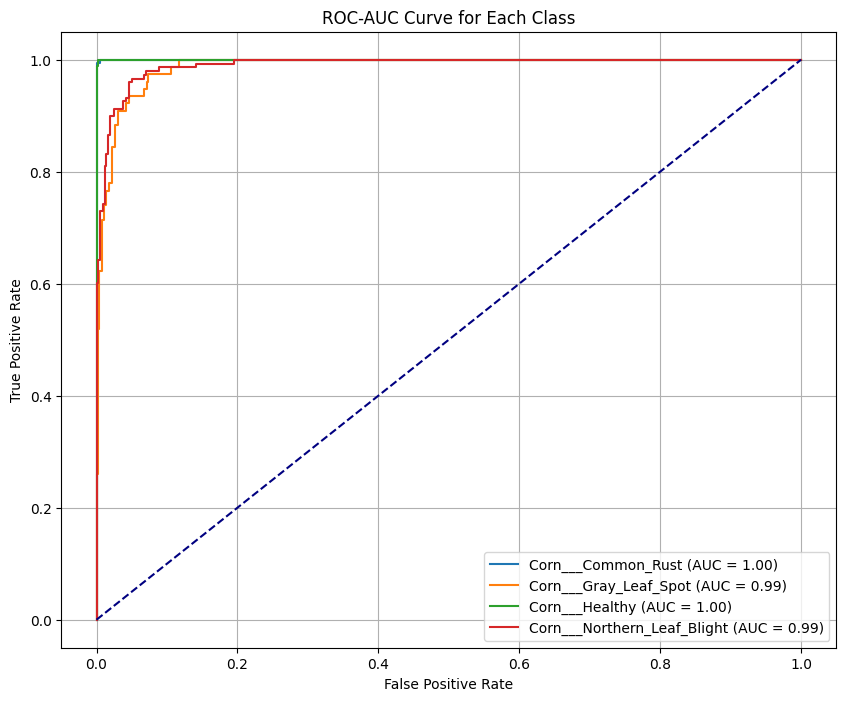

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 512ms/step


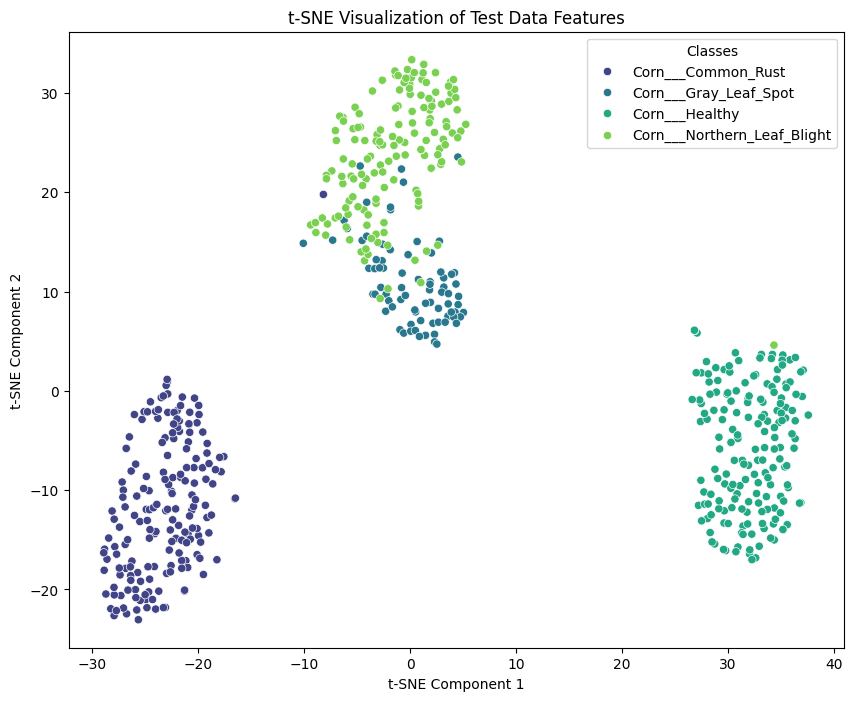

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import seaborn as sns

# Predictions on test data
y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Convert true labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=range(len(class_names)))

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# t-SNE Visualization
# Extract features from the concatenated layer before the final Dense layer
feature_extractor = Model(inputs=ensemble_model.input, outputs=ensemble_model.layers[-4].output)
features = feature_extractor.predict(test_generator)
labels = test_generator.classes

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=[class_names[label] for label in labels], palette="viridis", legend="full")
plt.title('t-SNE Visualization of Test Data Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title="Classes")
plt.show()


In [ ]:
ensemble_model.save("Corn.h5")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

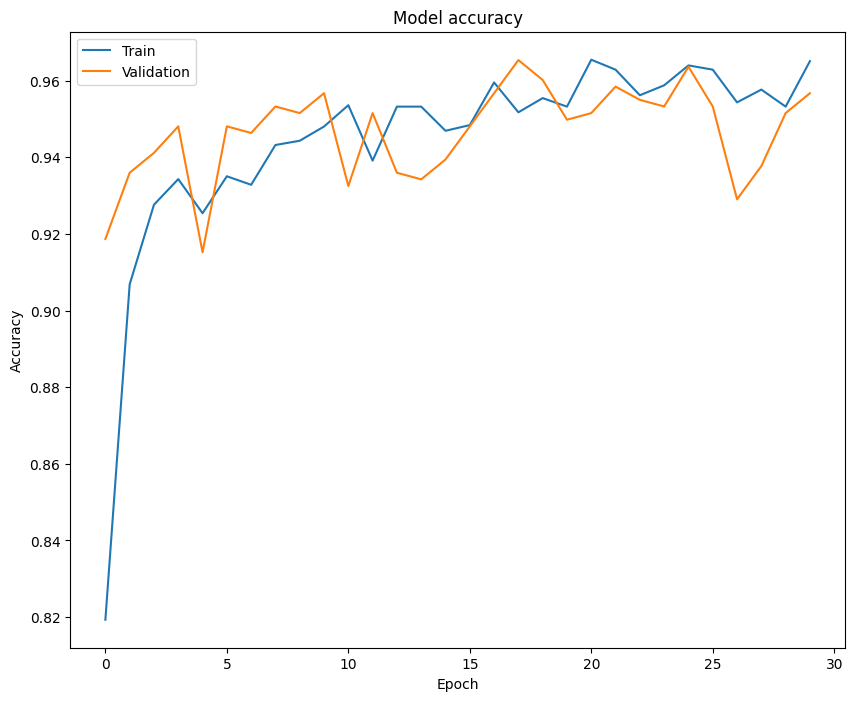

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

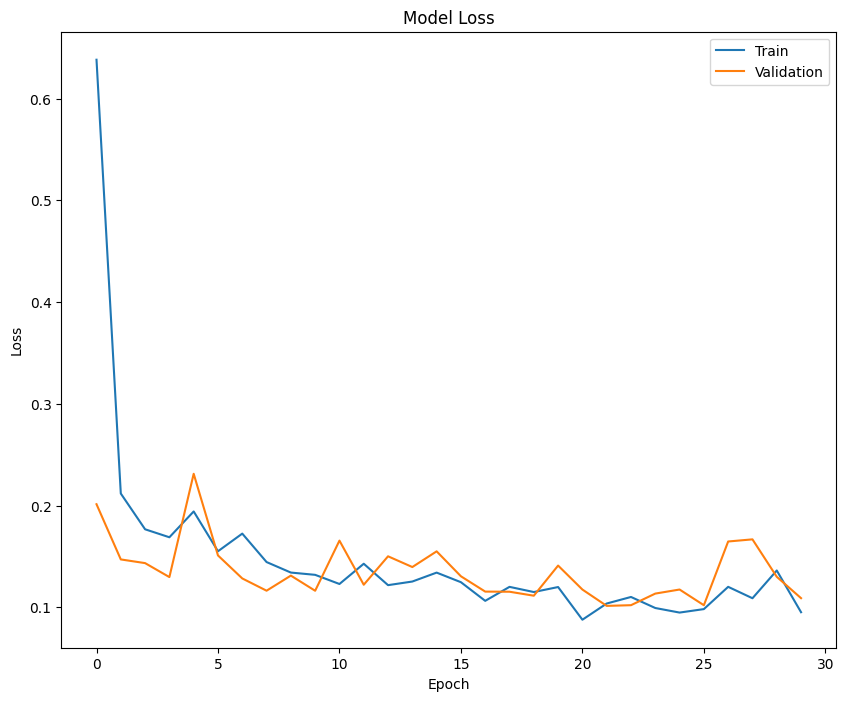

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
Classification Report
                             precision    recall  f1-score   support

         Corn___Common_Rust       0.99      0.99      0.99       179
      Corn___Gray_Leaf_Spot       0.82      0.90      0.86        77
             Corn___Healthy       0.99      1.00      1.00       175
Corn___Northern_Leaf_Blight       0.94      0.89      0.91       148

                   accuracy                           0.96       579
                  macro avg       0.94      0.94      0.94       579
               weighted avg       0.96      0.96      0.96       579

Confusion Matrix


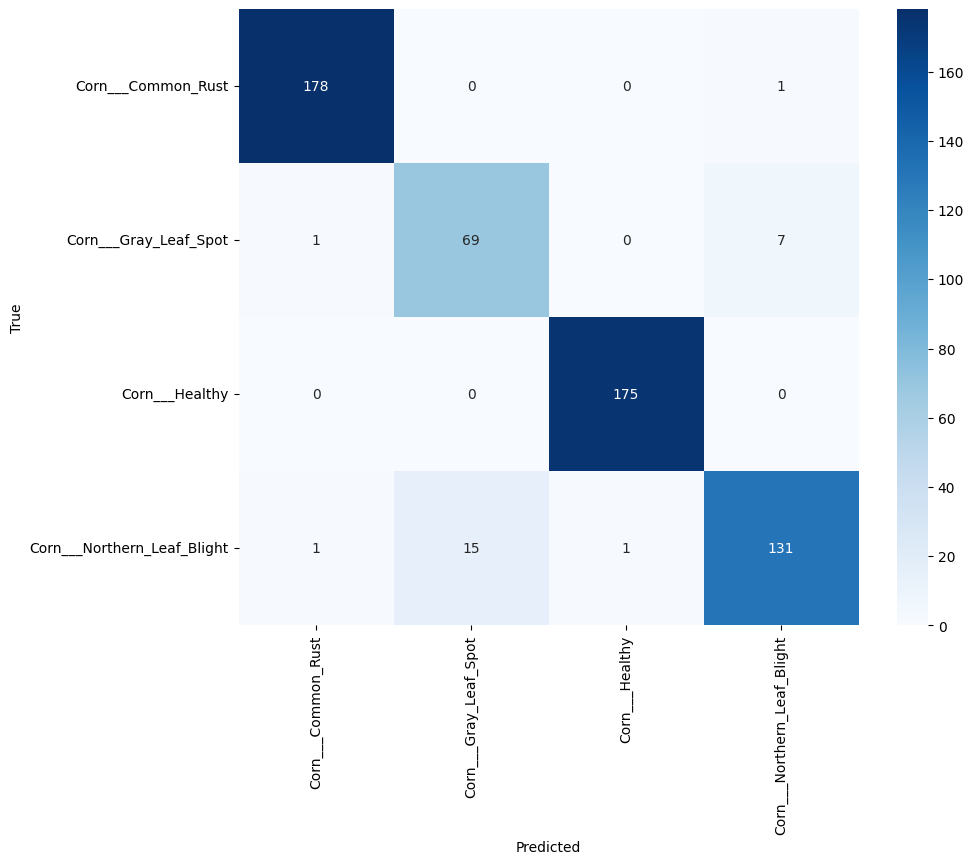

In [ ]:
# Generate predictions
Y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
y_pred = Y_pred

# Classification report
print('Classification Report')
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

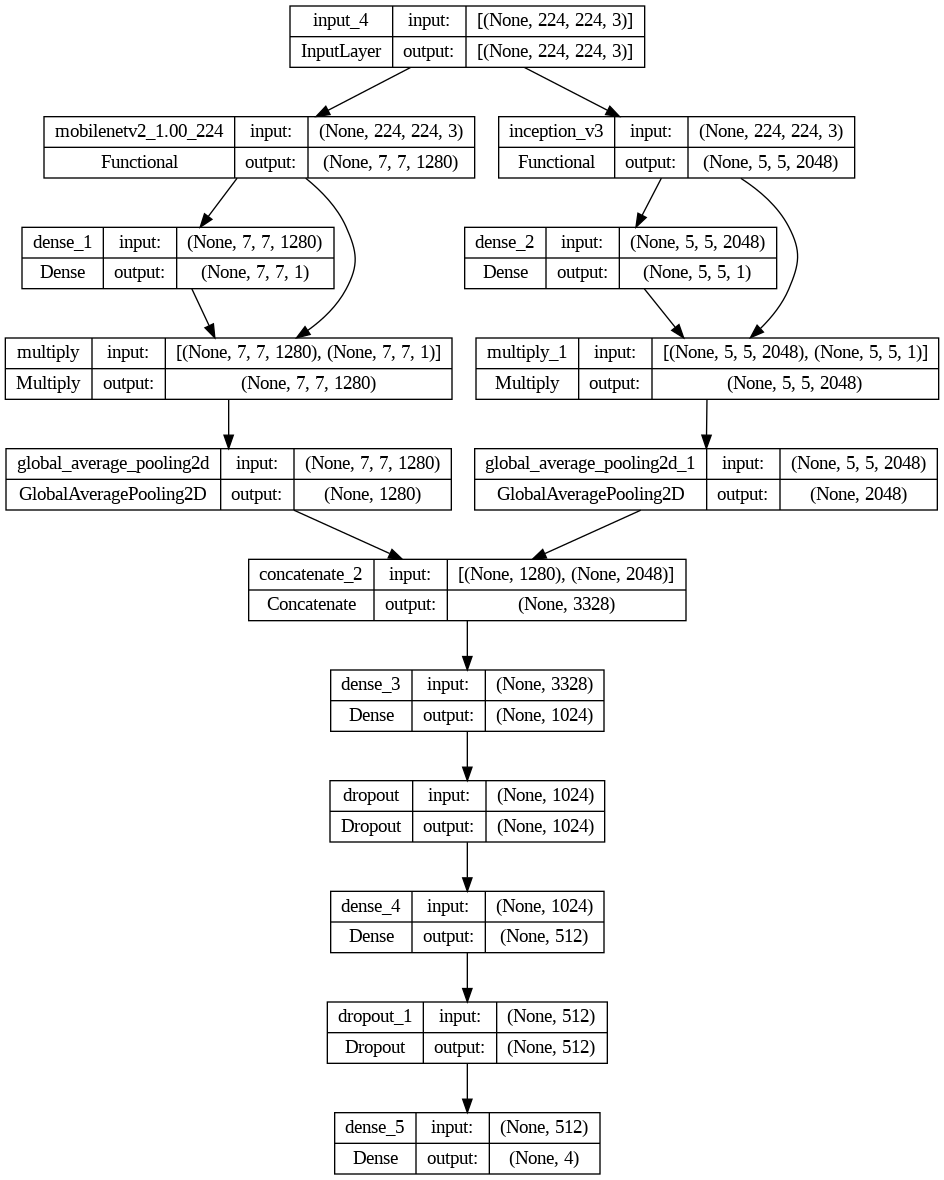

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(ensemble_model,  to_file='ensemble_model.png',show_shapes=True)

# **POTATO**




In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Ratios for splitting
train_ratio = 0.7
test_ratio = 0.1
val_ratio = 0.2

# Base directory
base_path = '/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Potato'
output_base_path = '/content'

# Valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')

# Function to split and copy images
def split_and_copy_images(class_name, class_path):
    files = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in files if img.lower().endswith(valid_extensions)]

    if len(images) == 0:
        print(f"No images found in {class_path}. Skipping this directory.")
        return

    train_images, test_val_images = train_test_split(images, test_size=(test_ratio + val_ratio), random_state=42)
    val_images, test_images = train_test_split(test_val_images, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

    split_images_dict = {
        'train2': train_images,
        'test2': test_images,
        'val2': val_images
    }

    for split in split_images_dict:
        split_class_path = os.path.join(output_base_path, split, class_name)
        os.makedirs(split_class_path, exist_ok=True)
        for img in split_images_dict[split]:
            shutil.copy(img, split_class_path)

# Main processing
classes = os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Potato")
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    split_and_copy_images(class_name, class_path)


In [ ]:
train_dir = '/content/train2'
val_dir = '/content/val2'
test_dir = '/content/test2'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

Found 1504 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Potato___Early_Blight': 0, 'Potato___Healthy': 1, 'Potato___Late_Blight': 2}

In [ ]:
from tensorflow.keras import layers, models
def apply_attention(inputs):
    attention_probs = Dense(1, activation='sigmoid')(inputs)
    attention_mul = Multiply()([inputs, attention_probs])
    return attention_mul

In [ ]:
# resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for model in [mobilenet,inception]:
    for layer in model.layers:
        layer.trainable = False

In [ ]:
inputs = Input(shape=(224, 224, 3))
# resnet_output = resnet(inputs)
# vgg_output = vgg(inputs)
mobilenet_output = mobilenet(inputs)
inception_output = inception(inputs)

mobilenet_output = apply_attention(mobilenet_output)
inception_output = apply_attention(inception_output)

# resnet_output = GlobalAveragePooling2D()(resnet_output)
# vgg_output = GlobalAveragePooling2D()(vgg_output)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)
inception_output = GlobalAveragePooling2D()(inception_output)

concatenated = Concatenate()([ mobilenet_output , inception_output])
x = Dense(1024, activation='relu')(concatenated)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

ensemble_model = Model(inputs, output)

In [ ]:
def combined_loss(y_true, y_pred):
    loss1 = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    loss2 = tf.keras.losses.categorical_hinge(y_true, y_pred)
    return 0.7 * loss1 + 0.3 * loss2

In [ ]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001
    ), loss=combined_loss, metrics=['accuracy'])
history=ensemble_model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 804ms/step - accuracy: 0.6610 - loss: 0.7346 - val_accuracy: 0.9349 - val_loss: 0.1734
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 456ms/step - accuracy: 0.9374 - loss: 0.1756 - val_accuracy: 0.9721 - val_loss: 0.0884
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - accuracy: 0.9479 - loss: 0.1658 - val_accuracy: 0.9186 - val_loss: 0.1785
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 433ms/step - accuracy: 0.9595 - loss: 0.1202 - val_accuracy: 0.9767 - val_loss: 0.0497
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 434ms/step - accuracy: 0.9626 - loss: 0.1096 - val_accuracy: 0.9767 - val_loss: 0.0449
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.9735 - loss: 0.0768 - val_accuracy: 0.9558 - val_loss: 0.0925
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 455ms/step - accuracy: 0.9620 - loss: 0.1260 - val_accuracy: 0.9674 - val_loss: 0.0906
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 434ms/step - accuracy: 0.9498 - loss: 0.1555 - val_accuracy: 0.958

In [ ]:
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9747 - loss: 0.0816
Test accuracy: 0.9816513657569885


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


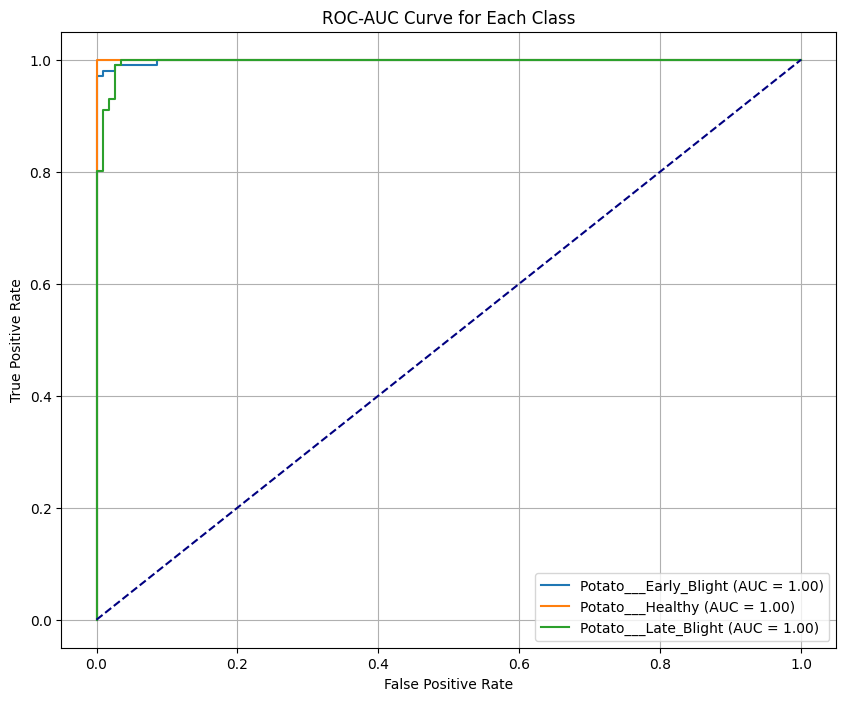

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


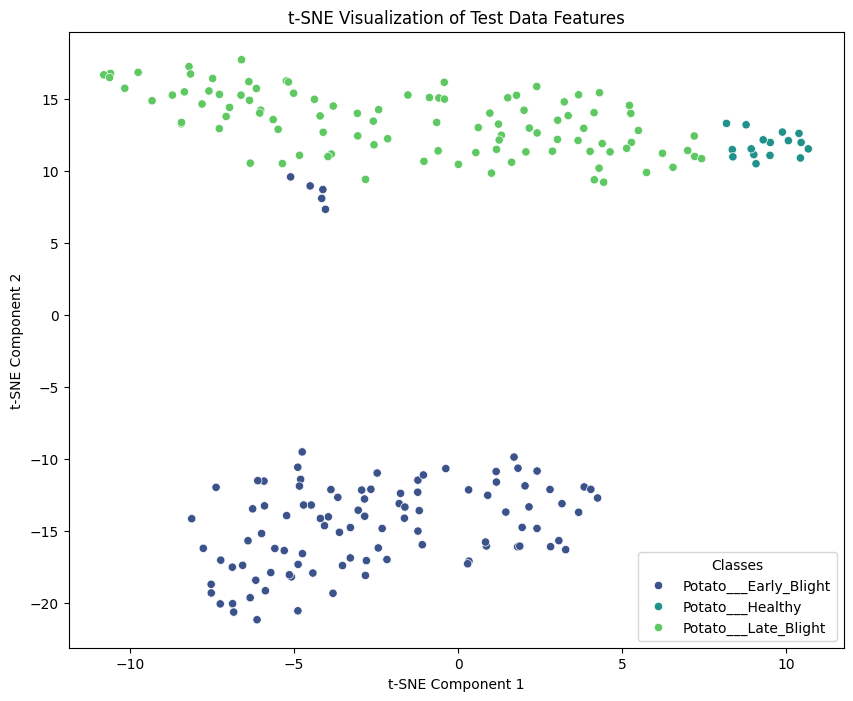

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import seaborn as sns

# Predictions on test data
y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Convert true labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=range(len(class_names)))

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# t-SNE Visualization
# Extract features from the concatenated layer before the final Dense layer
feature_extractor = Model(inputs=ensemble_model.input, outputs=ensemble_model.layers[-4].output)
features = feature_extractor.predict(test_generator)
labels = test_generator.classes

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=[class_names[label] for label in labels], palette="viridis", legend="full")
plt.title('t-SNE Visualization of Test Data Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title="Classes")
plt.show()


In [ ]:
ensemble_model.save("Potato.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

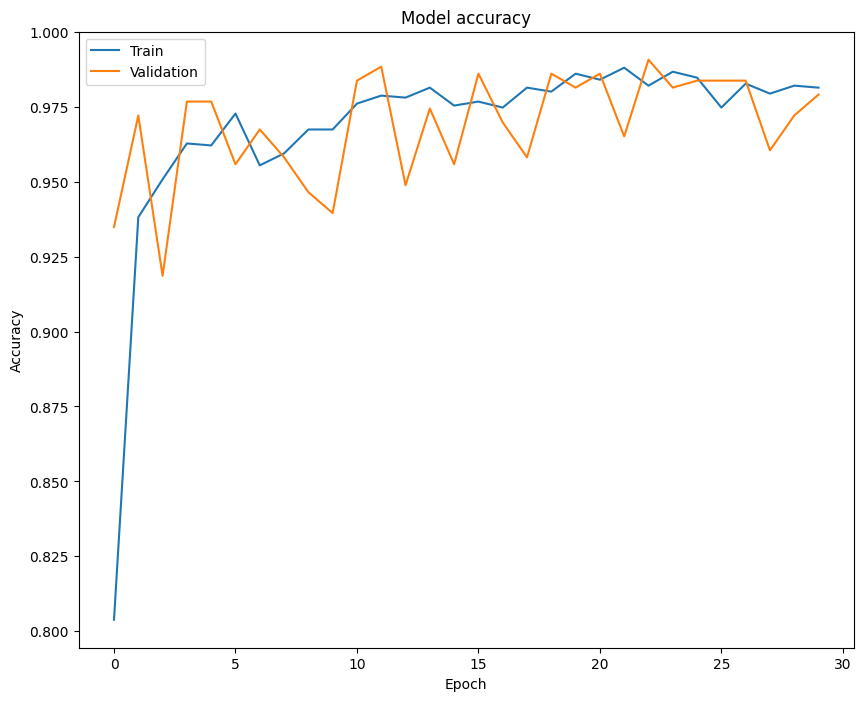

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

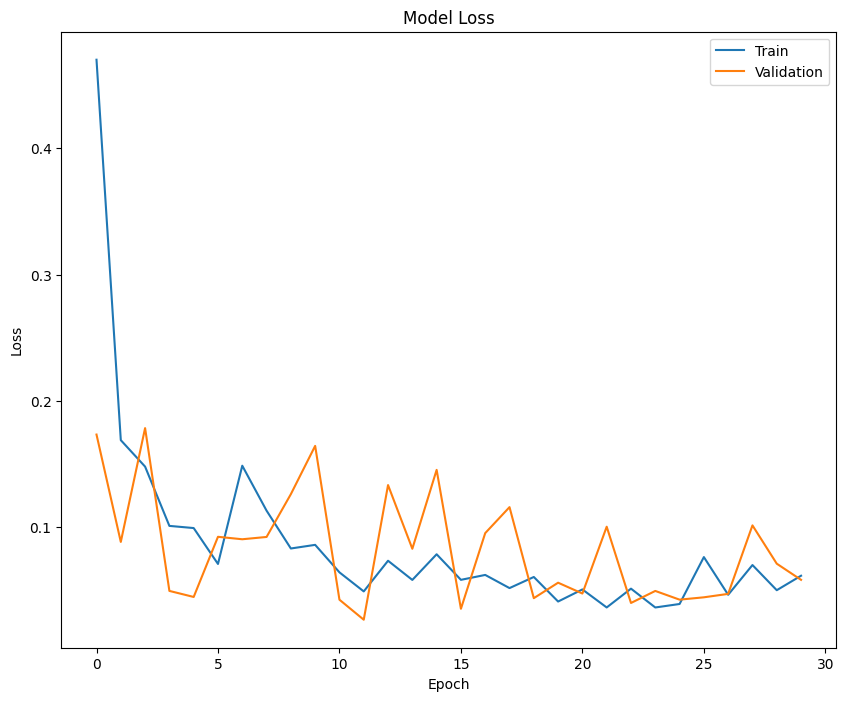

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Classification Report
                       precision    recall  f1-score   support

Potato___Early_Blight       1.00      0.96      0.98       101
     Potato___Healthy       1.00      1.00      1.00        16
 Potato___Late_Blight       0.96      1.00      0.98       101

             accuracy                           0.98       218
            macro avg       0.99      0.99      0.99       218
         weighted avg       0.98      0.98      0.98       218

Confusion Matrix


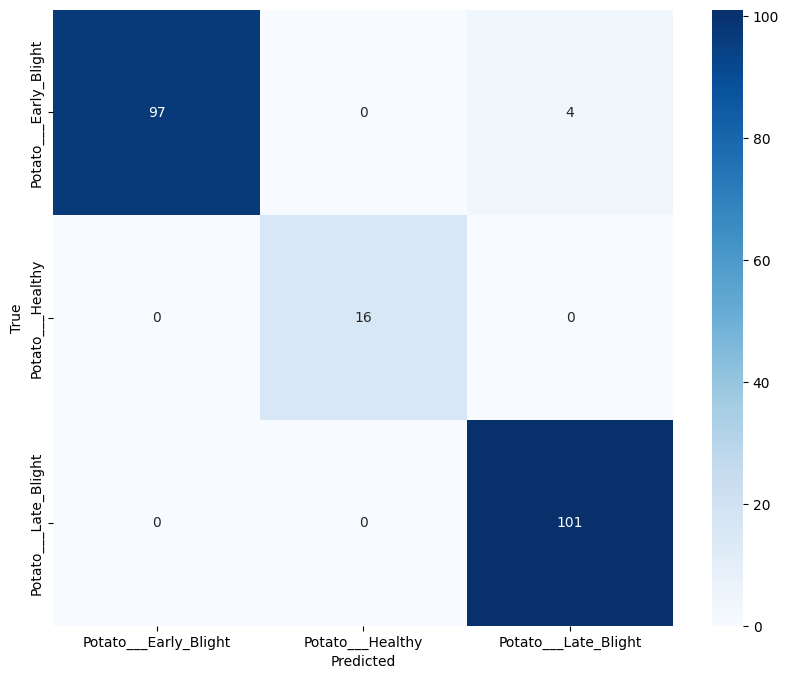

In [ ]:
# Generate predictions
Y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
y_pred = Y_pred

# Classification report
print('Classification Report')
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

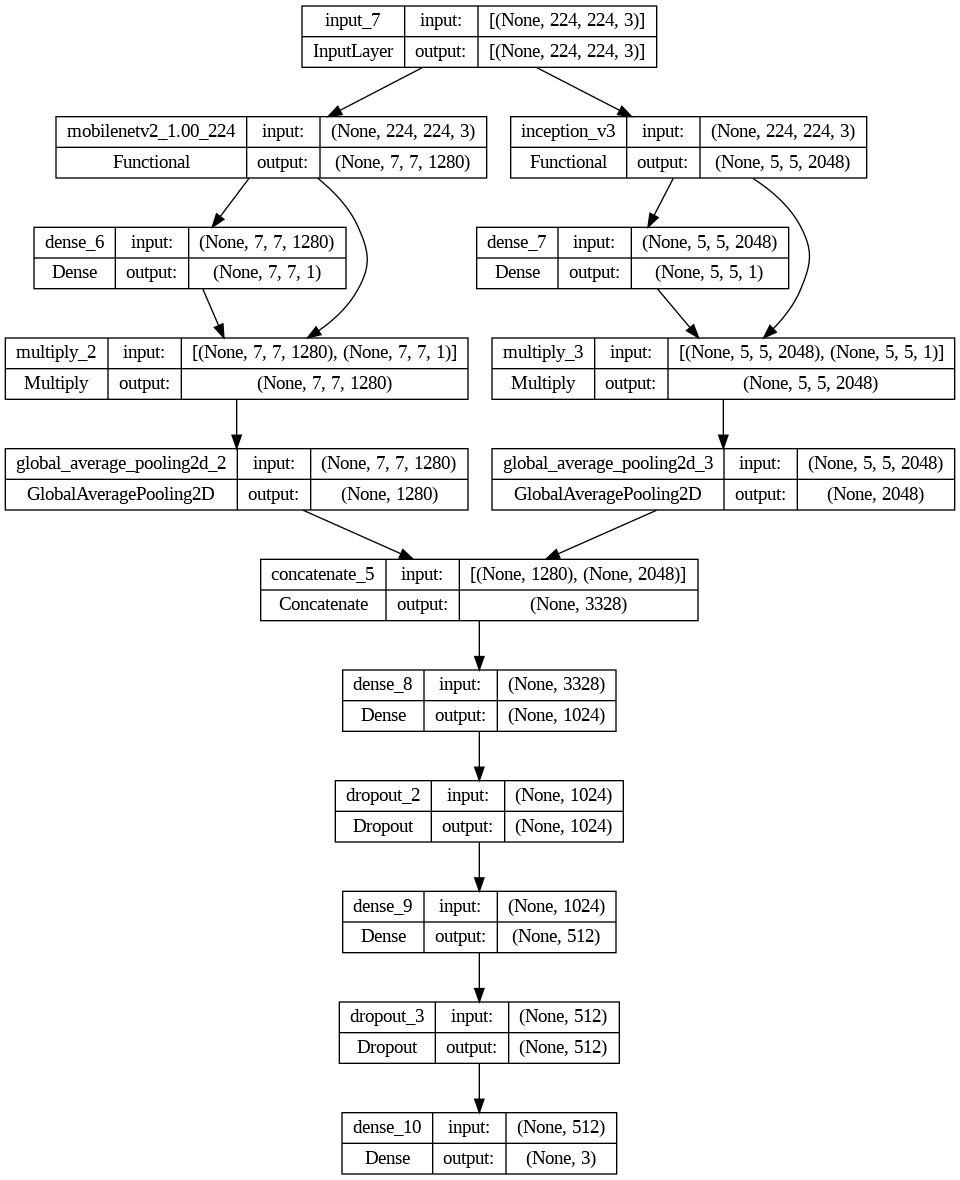

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(ensemble_model,  to_file='ensemble_model.png',show_shapes=True)

In [ ]:
ensemble_model.save("Potato.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **RICE**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
!pip uninstall -y tensorflow


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [ ]:
!pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 240
CHANNELS=3
EPOCHS=30

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Rice",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 4078 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Leaf_Blast',
 'Rice___Neck_Blast']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 240, 240, 3)
[1 0 1 1 0 1 2 3 3 3 1 1 3 3 2 3 1 1 0 1 1 1 0 3 1 3 1 0 1 2 0 3]


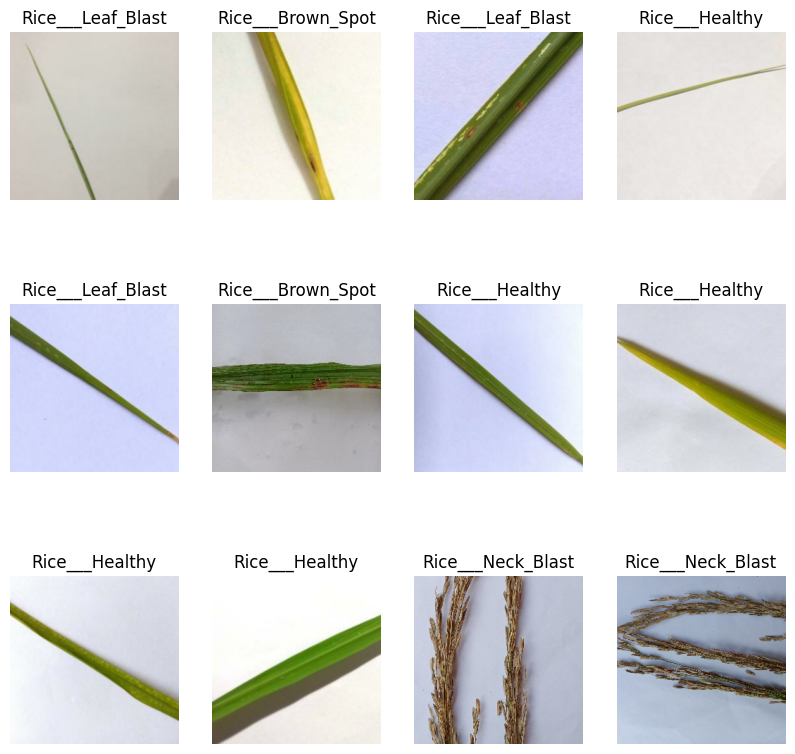

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # float is convertd into int , so "unit8"
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

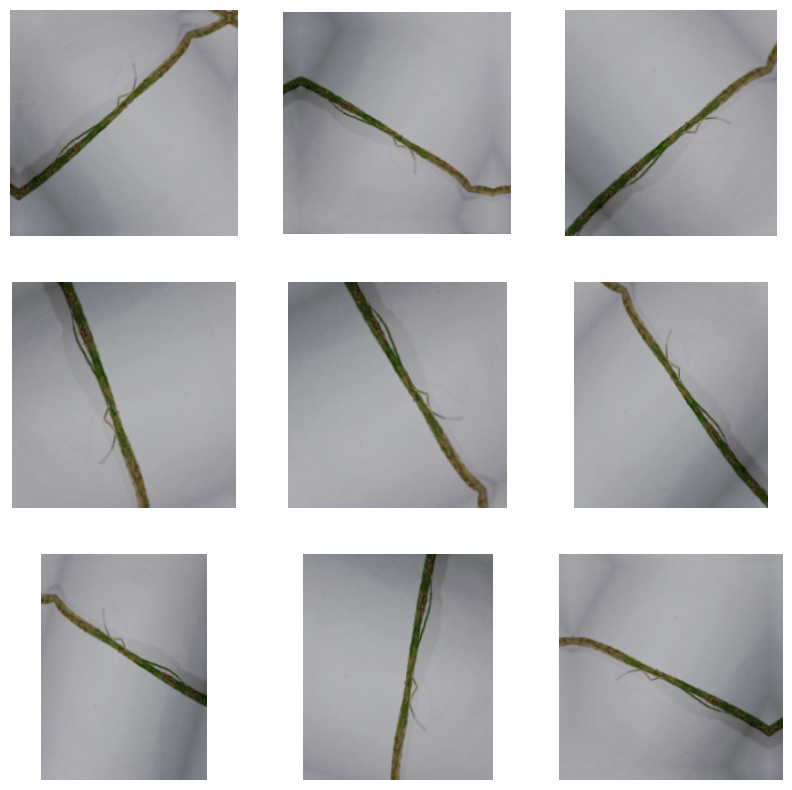

In [ ]:
for image, _ in dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [ ]:
train_ds = dataset.take(102)
test_ds = dataset.skip(102)
val_ds = test_ds.take(12)
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # IMAGE_SIZE=224
  layers.experimental.preprocessing.Rescaling(1./255),
])

# this resize and rescale layer will ultimately go to model and if some image is
# not according to the size, it will adjust it

In [ ]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Load the pre-trained EfficientNetB0 model
model = EfficientNetB1(weights='imagenet')

model.build(input_shape=input_shape)   # API



# Remove the last layer
base_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Add a new dense layer with 4 units (for 4 classes) and softmax activation
x = layers.Dense(n_classes, activation='softmax')(base_model.output)
model = models.Model(inputs=base_model.input, outputs=x)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, min_lr=1e-7)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[early_stopping,reduce_lr]
)

Epoch 1/30
102/102 [==============================] - 1692s 15s/step - loss: 0.5152 - accuracy: 0.8087 - val_loss: 0.8827 - val_accuracy: 0.7005 - lr: 0.0010
Epoch 2/30
102/102 [==============================] - 1574s 15s/step - loss: 0.3299 - accuracy: 0.8774 - val_loss: 0.2907 - val_accuracy: 0.9193 - lr: 0.0010
Epoch 3/30
102/102 [==============================] - 1582s 15s/step - loss: 0.2633 - accuracy: 0.9063 - val_loss: 0.2399 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 4/30
 31/102 [========>.....................] - ETA: 16:21 - loss: 0.2471 - accuracy: 0.9214

In [ ]:
-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
import seaborn as sns

# Convert test dataset to numpy arrays for evaluation
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)  # Predictions
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(preds)           # Probabilities

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Binarize the labels for ROC Curve
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Update class names
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# t-SNE Visualization
# Extract features from the model's dense layer before the softmax output
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

features = []
labels = []
for images, lbls in test_ds:
    feats = feature_extractor.predict(images)
    features.append(feats)
    labels.append(lbls.numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Plot t-SNE Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=[class_names[label] for label in labels],
                palette="viridis", legend="full")
plt.title('t-SNE Visualization of Test Data Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title="Classes")
plt.show()


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.864086 to fit



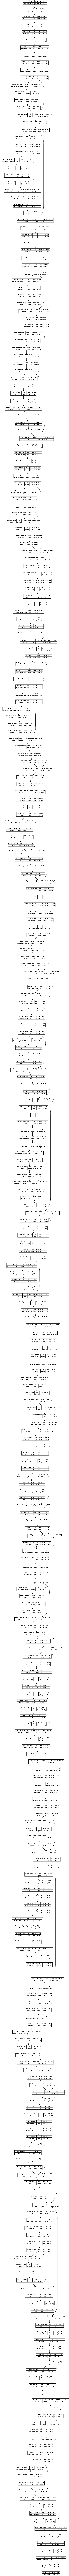

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model,  to_file='ensemble_model.png',show_shapes=True)

In [ ]:
model.save("Rice.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 18s 308ms/step - loss: 0.0425 - accuracy: 0.9844


In [ ]:
# Prediction
y_true = []
y_pred = []


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
for images_batch, labels_batch in test_ds:
    batch_predictions = model.predict(images_batch)
    y_true.extend(labels_batch.numpy())
    y_pred.extend(np.argmax(batch_predictions, axis=1))

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 0s 322ms/step
Classification Report:
                   precision    recall  f1-score   support

Rice___Brown_Spot       0.95      0.98      0.97       141
   Rice___Healthy       0.97      0.99      0.98       339
Rice___Leaf_Blast       1.00      0.97      0.98       217
Rice___Neck_Blast       1.00      0.98      0.99       199

         accuracy                           0.98       896
        macro avg       0.98      0.98      0.98       896
     weighted avg       0.98      0.98      0.98       896



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Confusion Matrix:
[[138   3   0   0]
 [  4 335   0   0]
 [  3   4 210   0]
 [  0   3   0 196]]


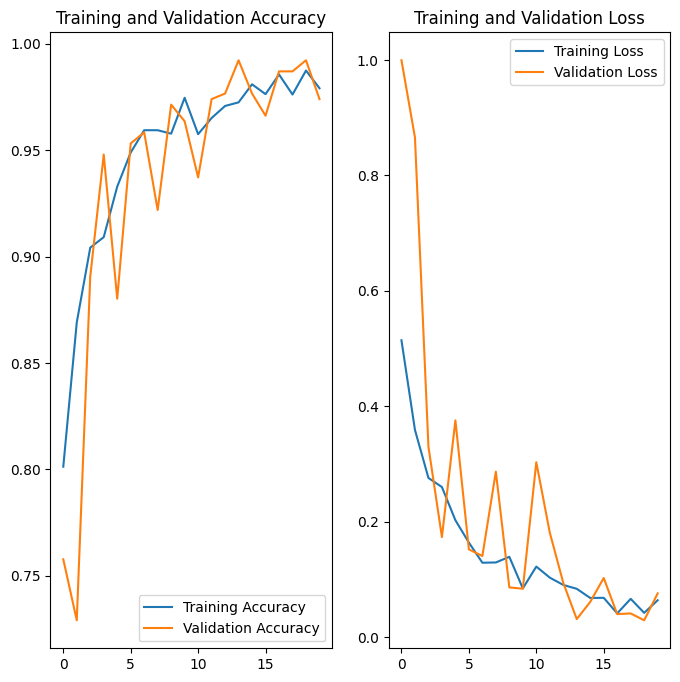

In [ ]:
plt.figure(figsize=(8, 8))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
# Check and align data lengths if needed
min_length = min(len(acc), len(val_acc), len(loss), len(val_loss))
acc, val_acc, loss, val_loss = acc[:min_length], val_acc[:min_length], loss[:min_length], val_loss[:min_length]

plt.subplot(1, 2, 1)
plt.plot(range(min_length), acc, label='Training Accuracy')
plt.plot(range(min_length), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(min_length), loss, label='Training Loss')
plt.plot(range(min_length), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


# **WHEAT**

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Ratios for splitting
train_ratio = 0.7
test_ratio = 0.1
val_ratio = 0.2

# Base directory
base_path = '/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat'
output_base_path = '/content'

# Valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')

# Function to split and copy images
def split_and_copy_images(class_name, class_path):
    files = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in files if img.lower().endswith(valid_extensions)]

    if len(images) == 0:
        print(f"No images found in {class_path}. Skipping this directory.")
        return

    train_images, test_val_images = train_test_split(images, test_size=(test_ratio + val_ratio), random_state=42)
    val_images, test_images = train_test_split(test_val_images, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

    split_images_dict = {
        'train4': train_images,
        'test4': test_images,
        'val4': val_images
    }

    for split in split_images_dict:
        split_class_path = os.path.join(output_base_path, split, class_name)
        os.makedirs(split_class_path, exist_ok=True)
        for img in split_images_dict[split]:
            shutil.copy(img, split_class_path)

# Main processing
classes = os.listdir("/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat")
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    split_and_copy_images(class_name, class_path)


In [ ]:
train_dir = '/content/train4'
val_dir = '/content/val4'
test_dir = '/content/test4'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255.0)


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

Found 2058 images belonging to 3 classes.
Found 588 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Wheat___Brown_Rust': 0, 'Wheat___Healthy': 1, 'Wheat___Yellow_Rust': 2}

In [ ]:
from tensorflow.keras import layers, models
def apply_attention(inputs):
    attention_probs = Dense(1, activation='softmax')(inputs)
    attention_mul = Multiply()([inputs, attention_probs])
    return attention_mul

In [ ]:
# resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for model in [mobilenet,inception]:
    for layer in model.layers:
        layer.trainable = False

In [ ]:
inputs = Input(shape=(224, 224, 3))
# resnet_output = resnet(inputs)
# vgg_output = vgg(inputs)
mobilenet_output = mobilenet(inputs)
inception_output = inception(inputs)

mobilenet_output = apply_attention(mobilenet_output)
inception_output = apply_attention(inception_output)

# resnet_output = GlobalAveragePooling2D()(resnet_output)
# vgg_output = GlobalAveragePooling2D()(vgg_output)
mobilenet_output = GlobalAveragePooling2D()(mobilenet_output)
inception_output = GlobalAveragePooling2D()(inception_output)

concatenated = Concatenate()([ mobilenet_output , inception_output])
x = Dense(1024, activation='relu')(concatenated)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

ensemble_model = Model(inputs, output)

In [ ]:
def combined_loss(y_true, y_pred):
    loss1 = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    loss2 = tf.keras.losses.categorical_hinge(y_true, y_pred)
    return 1.0 * loss1 + 0.0 * loss2

In [ ]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001
    ), loss=combined_loss, metrics=['accuracy'])
history=ensemble_model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if

65/65 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6781 - loss: 1.4468 - val_accuracy: 0.9490 - val_loss: 0.1450
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.9553 - loss: 0.1261 - val_accuracy: 0.9762 - val_loss: 0.0794
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 554ms/step - accuracy: 0.9533 - loss: 0.1221 - val_accuracy: 0.9830 - val_loss: 0.0538
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 40s 548ms/step - accuracy: 0.9715 - loss: 0.0810 - val_accuracy: 0.9031 - val_loss: 0.2778
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.9579 - loss: 0.1076 - val_accuracy: 0.9643 - val_loss: 0.0906
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.9700 - loss: 0.0787 - val_accuracy: 0.9575 - val_loss: 0.0962
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 40s 522ms/step - accuracy: 0.9708 - loss: 0.0959 - val_accuracy: 0.9830 - val_loss: 0.0420
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 42s 544ms/step - accuracy: 0.9681 - loss: 0.0754 - val_accuracy: 0.9558 -

In [ ]:
test_loss, test_acc = ensemble_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9892 - loss: 0.0273
Test accuracy: 0.9831081032752991


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

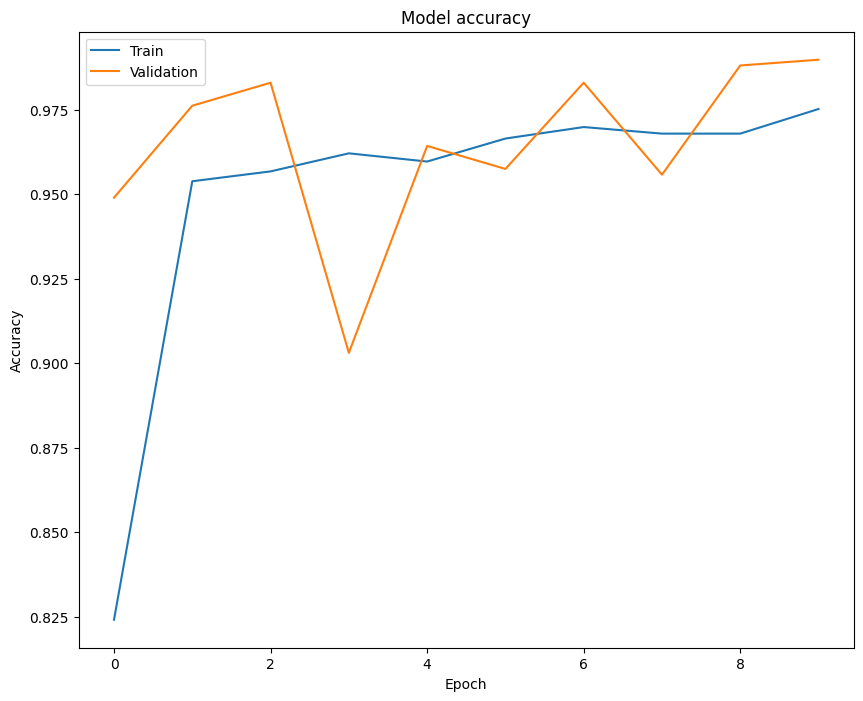

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

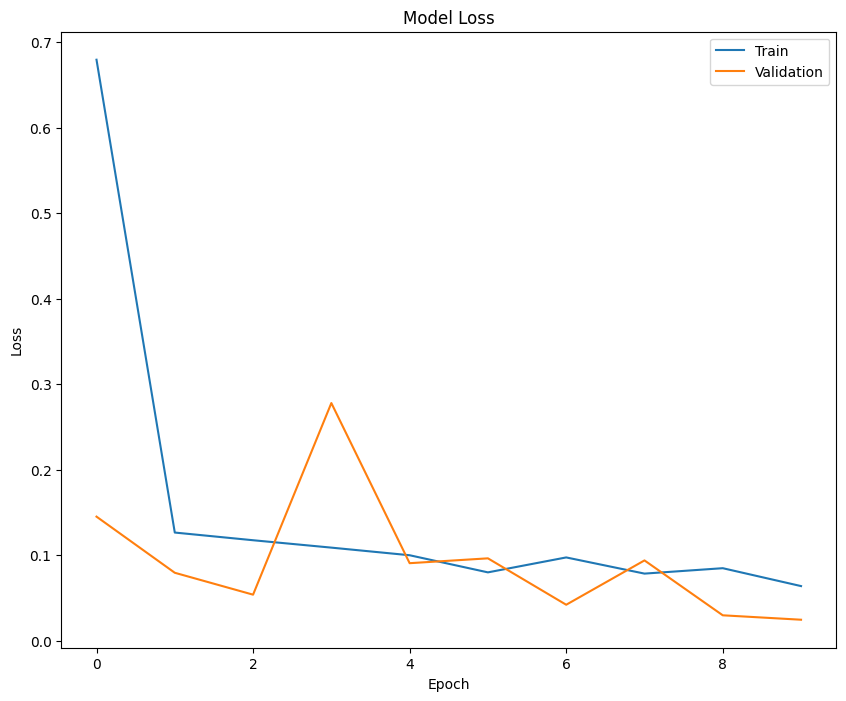

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 961ms/step


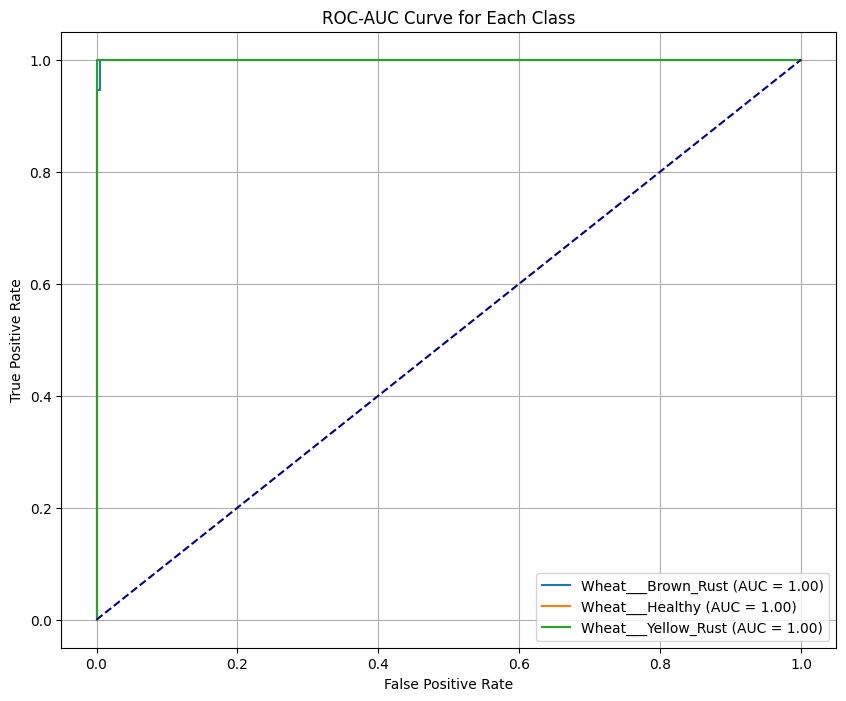

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 5, 5, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 7, 7, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 870ms/step


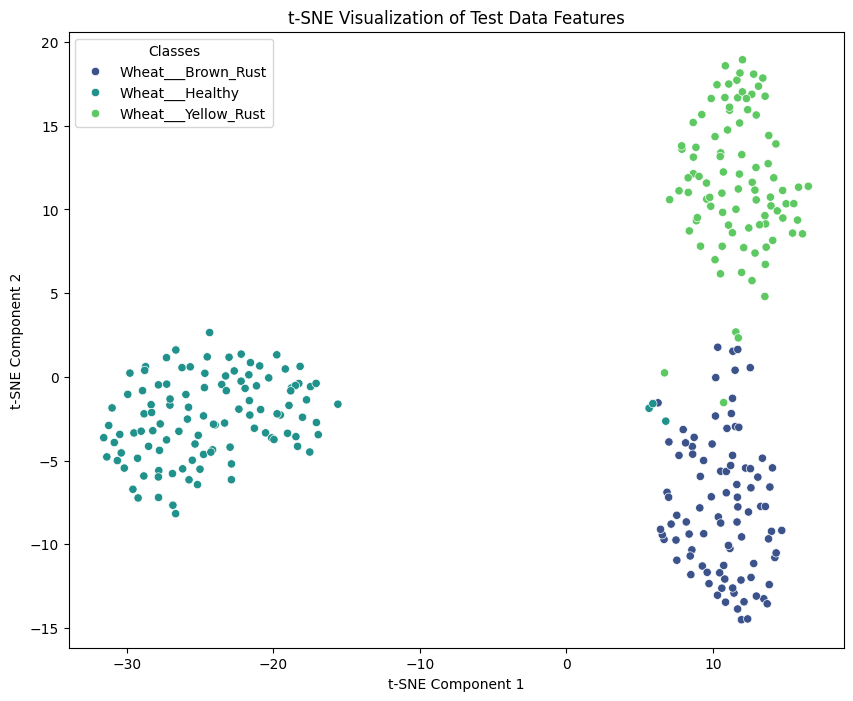

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import seaborn as sns

# Predictions on test data
y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Convert true labels to one-hot encoding
y_true_onehot = label_binarize(y_true, classes=range(len(class_names)))

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# t-SNE Visualization
# Extract features from the concatenated layer before the final Dense layer
feature_extractor = Model(inputs=ensemble_model.input, outputs=ensemble_model.layers[-4].output)
features = feature_extractor.predict(test_generator)
labels = test_generator.classes

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=[class_names[label] for label in labels], palette="viridis", legend="full")
plt.title('t-SNE Visualization of Test Data Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title="Classes")
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step
Classification Report
                     precision    recall  f1-score   support

 Wheat___Brown_Rust       0.95      1.00      0.97        91
    Wheat___Healthy       1.00      0.97      0.99       112
Wheat___Yellow_Rust       1.00      0.98      0.99        93

           accuracy                           0.98       296
          macro avg       0.98      0.98      0.98       296
       weighted avg       0.98      0.98      0.98       296

Confusion Matrix


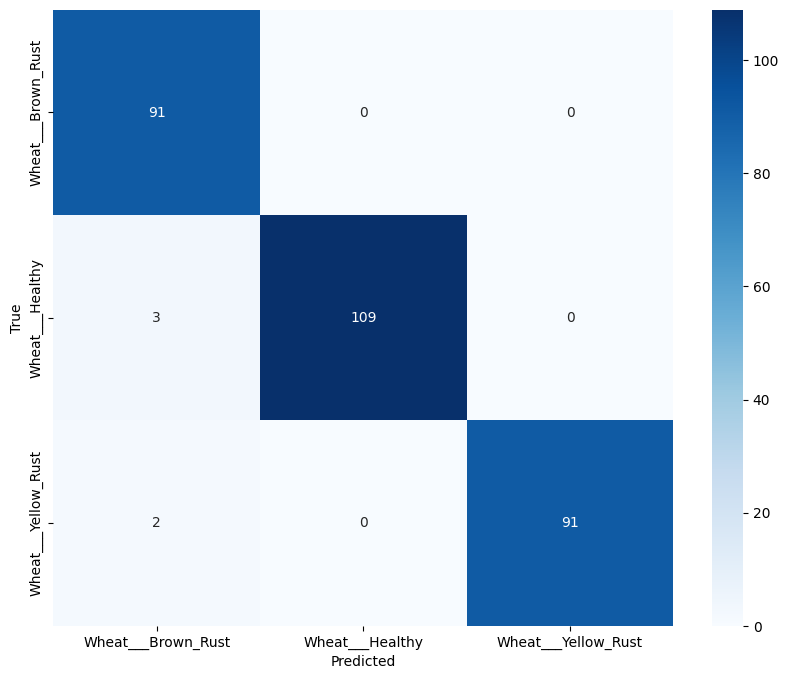

In [ ]:
# Generate predictions
Y_pred = ensemble_model.predict(test_generator)
y_true = test_generator.classes
y_pred = Y_pred

# Classification report
print('Classification Report')
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

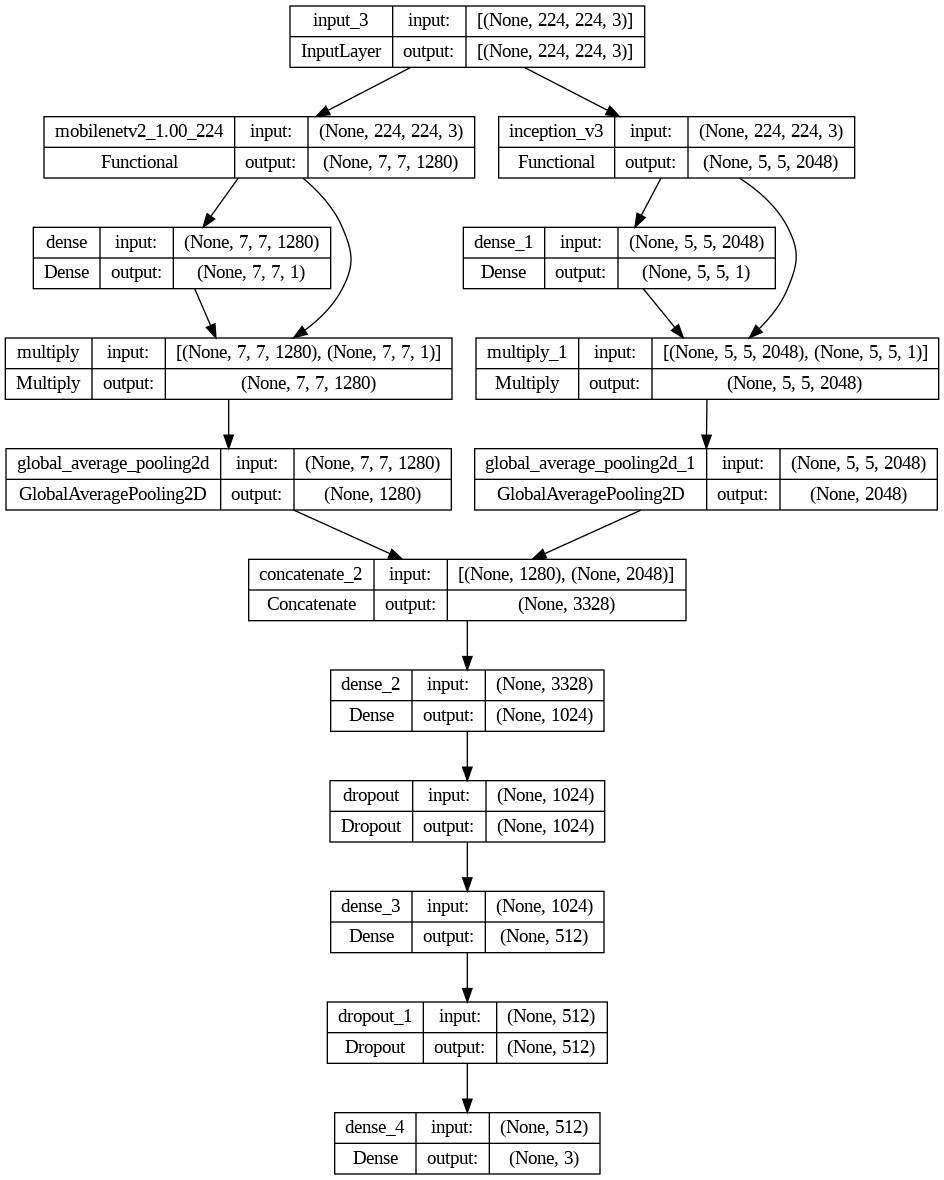

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(ensemble_model,  to_file='ensemble_model.png',show_shapes=True)

In [ ]:
ensemble_model.save("Wheat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, img_path, class_indices):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label


img_path = '/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Corn/Corn___Healthy/image (1).jpg'
class_indices = train_generator.class_indices
predicted_label = predict_image(ensemble_model, img_path, class_indices)
print(f'The predicted label is: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted label is: Corn___Healthy


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.0
